In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [243]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [244]:
df.shape

(962, 2)

# Exploring Categories

In [245]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

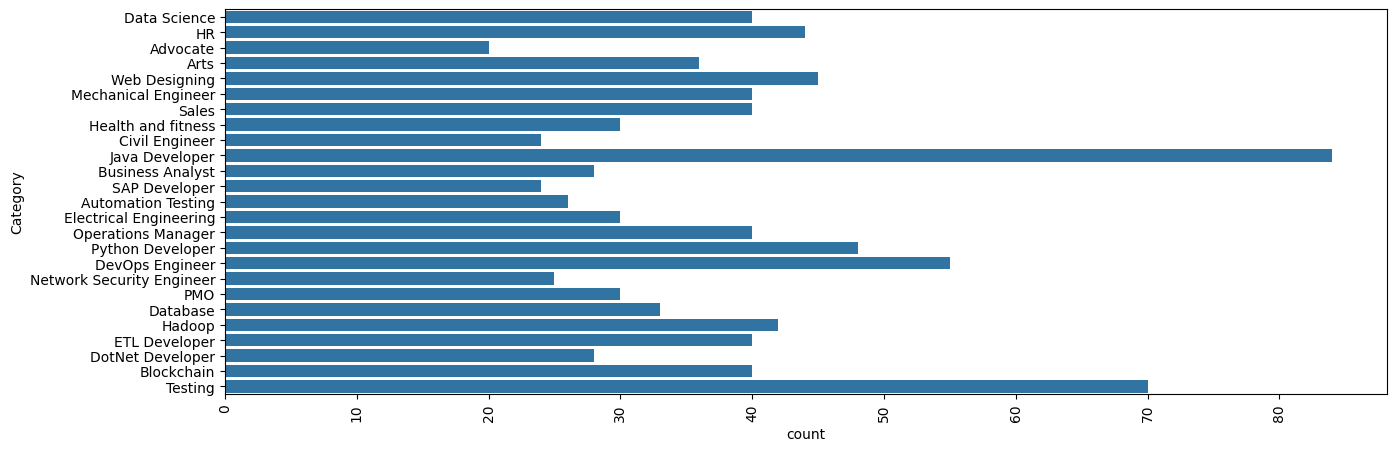

In [246]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [247]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

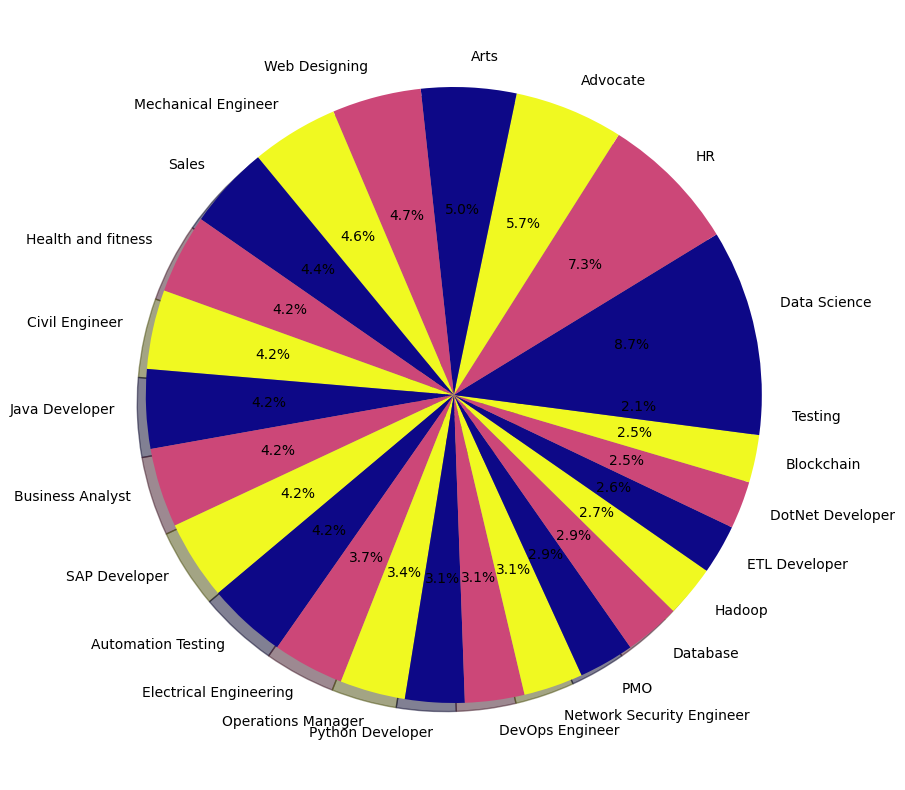

In [248]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

# Exploring Resume

In [249]:
df['Category'][0]

'Data Science'

In [250]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data:                                      
1 URLs,                                                
2 hashtags,                                             
3 mentions,                                                     
4 special letters,                                             
5 punctuations:                                             

In [251]:
import re

def cleanResume(txt):
    # Remove URLs
    cleanText = re.sub(r'http\S+\s', ' ', txt)
    
    # Remove RT and cc (Retweet and Carbon Copy from Twitter)
    cleanText = re.sub(r'\b(RT|cc)\b', ' ', cleanText)
    
    # Remove hashtags
    cleanText = re.sub(r'#\S+', ' ', cleanText)
    
    # Remove mentions
    cleanText = re.sub(r'@\S+', ' ', cleanText)  
    
    # Remove special characters
    cleanText = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~]', ' ', cleanText)
    
    # Remove non-ASCII characters
    cleanText = re.sub(r'[^\x00-\x7F]+', ' ', cleanText)
    
    # Replace multiple spaces with a single space
    cleanText = re.sub(r'\s+', ' ', cleanText)
    
    return cleanText.strip()



In [252]:
cleanResume("my #### $ #  #vidhi webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and access it'

In [253]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [254]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

# words into categorical values

In [255]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [256]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [257]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [258]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# Vactorization

In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Assuming 'df' is a DataFrame with 'Resume' (input text) and 'Category' (target labels)
X = df['Resume']  # Input resumes
y = df['Category']  # Target categories (e.g., job roles)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Initialize the classifier
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))

# Create a pipeline that combines the TfidfVectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),  # Convert resumes to TF-IDF features
    ('classifier', clf)  # Apply the classifier
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Save the trained pipeline (with both TfidfVectorizer and classifier) using pickle
with open('clf_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# You can also access the individual tfidf vectorizer and classifier separately if needed
# Access the trained TfidfVectorizer
trained_tfidf = pipeline.named_steps['tfidf']

# Access the trained classifier
trained_clf = pipeline.named_steps['classifier']


Accuracy: 0.98


# Splitting

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
# Assuming 'df' is a DataFrame with 'Resume' (input text) and 'Category' (target labels)
X = df['Resume']  # Input resumes
y = df['Category']  # Target categories (e.g., job roles)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with vectorization and model training


In [262]:
X_train.shape

(769,)

In [263]:
X_test.shape

(193,)

# print the classification report:

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  # Import the vectorizer

# Assuming df['Resume'] has the cleaned resume texts and df['Category'] has the encoded labels
Text = df['Resume']  # Define Text variable
X_train, X_test, y_train, y_test = train_test_split(Text, df['Category'], test_size=0.2, random_state=42)

# Create a pipeline with vectorization, scaling, and classification
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Vectorization step
    ('scaler', StandardScaler(with_mean=False)),  # Feature scaling without centering
    ('classifier', OneVsRestClassifier(KNeighborsClassifier()))
])

# Define a grid of hyperparameters to tune
param_grid = {
    'classifier__estimator__n_neighbors': [3, 5, 7, 9],
    'classifier__estimator__weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'classifier__estimator__p': [1, 2]  # Manhattan (p=1) or Euclidean (p=2)
}

# Set up the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model using Grid Search
grid_search.fit(X_train, y_train)

# Predict using the best model
ypred = grid_search.predict(X_test)

# Print the accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy Score:", accuracy_score(y_test, ypred))


Best Hyperparameters: {'classifier__estimator__n_neighbors': 3, 'classifier__estimator__p': 2, 'classifier__estimator__weights': 'distance'}
Accuracy Score: 0.9844559585492227


In [265]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2, 12, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8, 12,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 12,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

# Prediction System

In [266]:
import pickle
pickle.dump(tfidf,open('tfidfVectorizer.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [267]:
myresume = """John Doe
Email: john.doe@example.com | Phone: +1234567890 | Location: New York, NY

PROFESSIONAL SUMMARY
Highly skilled and results-driven Software Engineer with 5+ years of experience in developing and deploying scalable web applications using Python, Java, and DevOps practices. Adept in cloud technologies, microservices architecture, and automation. Seeking a challenging role in a dynamic organization to leverage my expertise in full-stack development, DevOps, and cloud infrastructure.

SKILLS
- Programming Languages: Python, Java, JavaScript, HTML/CSS
- Frameworks: Django, Flask, Spring Boot, React.js
- Databases: MySQL, MongoDB, PostgreSQL
- DevOps Tools: Docker, Jenkins, Kubernetes, Ansible
- Cloud Platforms: AWS, Azure, GCP
- Version Control: Git, GitHub, Bitbucket
- CI/CD Pipelines: Jenkins, GitLab CI/CD
- Testing: JUnit, Selenium, PyTest
- Agile Methodologies: Scrum, Kanban

EXPERIENCE
Software Engineer | ABC Corp | New York, NY | June 2020 - Present
- Led the development of a cloud-native Python application for data analytics, resulting in a 20% increase in performance.
- Designed and implemented CI/CD pipelines using Jenkins and Docker, reducing deployment times by 50%.
- Collaborated with cross-functional teams to deliver a scalable microservices architecture using Spring Boot and Kubernetes.
- Deployed applications on AWS, utilizing EC2, S3, Lambda, and RDS services.
- Conducted code reviews, testing, and troubleshooting of production systems to maintain a 99.9% uptime.

Full Stack Developer | XYZ Solutions | Boston, MA | January 2018 - May 2020
- Developed and maintained full-stack applications using React.js, Node.js, and Python/Django, improving user experience by 30%.
- Integrated RESTful APIs for seamless communication between frontend and backend services.
- Automated infrastructure management using Ansible and Terraform, leading to improved system reliability.
- Implemented security best practices and performed regular code audits.

EDUCATION
Bachelor of Science in Computer Science | University of California, Berkeley | 2017

CERTIFICATIONS
- AWS Certified Solutions Architect
- Google Cloud Certified Professional DevOps Engineer
- Oracle Certified Java Programmer

PROJECTS
1. Cloud-Based ETL Pipeline:
   Developed an ETL pipeline for processing large datasets using Python, Docker, and AWS Lambda.

2. DevOps Dashboard:
   Created a real-time monitoring dashboard for cloud infrastructure using Prometheus and Grafana.

3. Blockchain Voting System:
   Led a team to build a blockchain-based secure voting system using Hyperledger.

VOLUNTEERING
- Mentor for Python developers at Open Source Society.
- Contributor to open-source DevOps projects on GitHub.



"""

In [268]:
import numpy as np
import pickle

# Function to apply softmax to an array
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtracting max for numerical stability
    return e_x / e_x.sum(axis=0)

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Get the probability estimates for all categories
raw_probabilities = clf.predict_proba(input_features)[0]

# Apply softmax to the raw probabilities to normalize
probabilities = softmax(raw_probabilities)

# Get the top N categories (e.g., top 15 categories)
N = 5
top_n_indices = np.argsort(probabilities)[-N:][::-1]  # Get indices of top N categories

# Mapping of category indices to job titles
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    30:"Professor",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

# Get the top N predicted category names with percentage match
top_n_categories = [(category_mapping.get(index, "Unknown"), round(probabilities[index] * 100, 2)) for index in top_n_indices]

# Print the top N predicted categories with percentage match
print("Top N Predicted Categories with Match Percentage:")
for category, match_percent in top_n_categories:
    print(f"Category: {category}, Match: {match_percent}%")


Top N Predicted Categories with Match Percentage:
Category: Arts, Match: 10.17%
Category: Testing, Match: 3.74%
Category: Sales, Match: 3.74%
Category: SAP Developer, Match: 3.74%
Category: Python Developer, Match: 3.74%


In [270]:
import re
import spacy


nlp = spacy.load("en_core_web_sm")

myresume = """John Doe
123 Street Name
City, State, Zip Code
Email: johndoe@email.com
Phone: +123-456-7890

Objective:
A Web Developer with 3 years of experience in front-end development, backend API integration, and full-stack project management. Skilled in various web technologies and eager to learn new languages and frameworks.

Work Experience:

Web Developer | XYZ Web Solutions
June 2021 – Present
- Built responsive websites using HTML, CSS, and JavaScript, improving user experience by 40%.
- Developed REST APIs with Node.js and Express.js, optimizing data retrieval.
- Worked closely with designers to implement modern UI/UX designs using React.js.
- Deployed applications on AWS with continuous integration/continuous delivery (CI/CD) pipelines using Jenkins and Docker.
- Enhanced website performance by optimizing assets and reducing page load time by 25%.
- Collaborated with cross-functional teams, including QA and designers, to achieve project goals.

Education:

Bachelor of Science in Computer Science | ABC University
Graduated: May 2020
- Relevant coursework: Web Development, Software Engineering, Algorithms, and Databases

Skills:
- HTML, CSS, JavaScript, React.js, Node.js
- REST APIs, Express.js, MongoDB
- AWS, Docker, Jenkins
- Git, Agile Methodologies, Scrum

Certifications:
- AWS Certified Developer
- Google Mobile Web Specialist
- JavaScript Algorithms and Data Structures (freeCodeCamp)

Languages:
- English (Fluent)
- Spanish (Intermediate)
"""


def extract_skills(text):
    skill_keywords = [
        "HTML", "CSS", "JavaScript", "React.js", "Node.js", "Express.js", "MongoDB", 
        "AWS", "Docker", "Jenkins", "Git", "Agile", "Scrum","PHD"
    ]
    
    skills_found = [skill for skill in skill_keywords if re.search(rf"\b{skill}\b", text, re.IGNORECASE)]
    return skills_found

def extract_certifications(text):
    # Improved pattern for certifications
    certifications_pattern = re.compile(r'(?i)(certifications?|certified):?\s*(.*?)(?=\n|$)', re.DOTALL)
    certifications = certifications_pattern.findall(text)

    # Flatten the list and remove any extra spaces
    certifications_list = [cert.strip() for _, cert in certifications]
    return certifications_list

def extract_achievements(text):
    achievements_pattern = re.compile(r"(improved|increased|reduced|optimized|enhanced|led).*", re.IGNORECASE)
    achievements = achievements_pattern.findall(text)
    return achievements

def extract_resume_data(text):
    doc = nlp(text)
    cleaned_text = ' '.join([token.text for token in doc if not token.is_stop and not token.is_punct])
    
    skills = extract_skills(cleaned_text)
    certifications = extract_certifications(cleaned_text)
    achievements = extract_achievements(cleaned_text)
    
    return {
        'Skills': skills,
        'Certifications': certifications,
        'Achievements': achievements
    }

# Extract information from the sample resume
resume_data = extract_resume_data(myresume)
print("Extracted Data:")
print(resume_data)


Extracted Data:
{'Skills': ['HTML', 'CSS', 'JavaScript', 'React.js', 'Node.js', 'Express.js', 'MongoDB', 'AWS', 'Docker', 'Jenkins', 'Git', 'Agile', 'Scrum'], 'Certifications': ['AWS Certified Developer'], 'Achievements': ['led', 'Enhanced']}
